Diffusers needs `libGL` to run, otherwise we get this import error:<br/>
`ImportError: libGL.so.1: cannot open shared object file: No such file or directory`

We therfore install it.

In [1]:
! apt-get update -qq
! apt-get install -y -qq libgl1-mesa-glx

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from diffusers.pipelines.prompt2prompt.pipeline_prompt2prompt import Prompt2PromptPipeline, AttentionReplace

/home/.local/share/virtualenvs/notebooks-TPEo7knB/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
g_cpu = torch.Generator().manual_seed(2333)
device = "cuda"

In [4]:
pipe = Prompt2PromptPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)

Loading pipeline components...:  14%|█▍        | 1/7 [00:00<00:00,  6.79it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.57it/s]


In [5]:
def show_images(images):
    for im in images:
        plt.imshow(np.array(im))
        plt.show()

## Test: ReplaceEdit

In [6]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle playing with a ball",
           "A monkey playing with a ball"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4
}

In [7]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='replace', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:25<00:00,  1.94it/s]
/home/diffusers/diffusers/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:429: FutureWarning: The decode_latents method is deprecated and will be removed in a future version. Please use VaeImageProcessor instead
  warnings.warn(


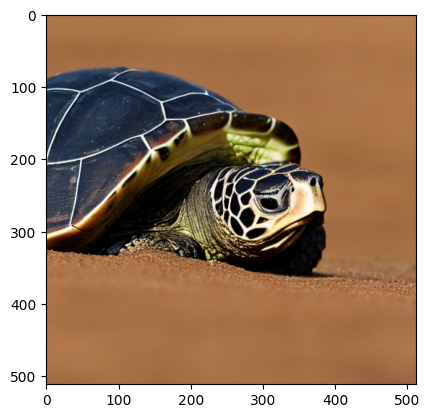

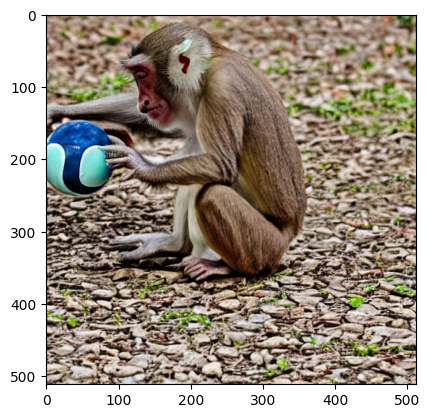

In [8]:
show_images(outputs.images)

## ReplaceEdit + LocalBlend

In [9]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle playing with a ball",
           "A monkey playing with a ball"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4,
    "local_blend_words": ["turtle", "monkey"]
}

In [10]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='replace', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:25<00:00,  1.96it/s]


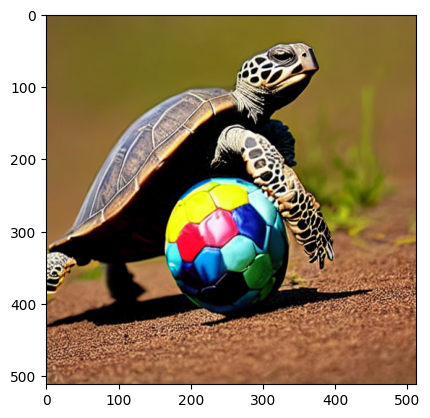

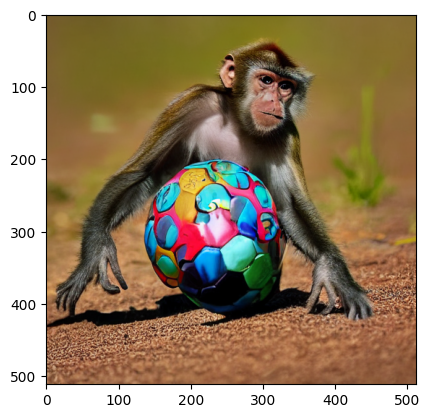

In [11]:
show_images(outputs.images)

## RefineEdit

In [12]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle",
           "A turtle in a forest"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4,
}

In [13]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='refine', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:25<00:00,  1.94it/s]


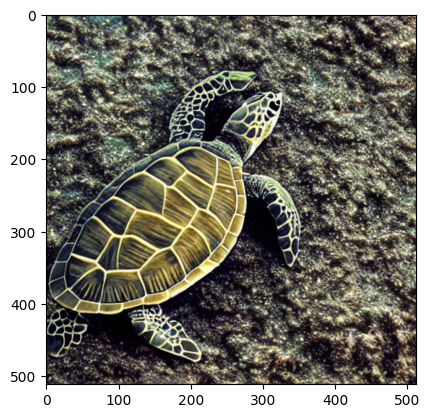

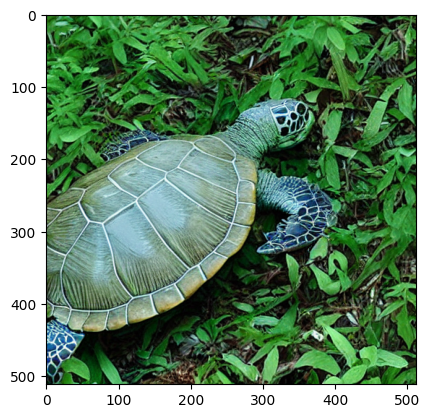

In [14]:
show_images(outputs.images)

## RefineEdit + LocalBlend

In [15]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A cat",
           "A cat with a ball"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4,
    "local_blend_words": ["with", "a" , "ball"]
}

In [16]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='refine', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


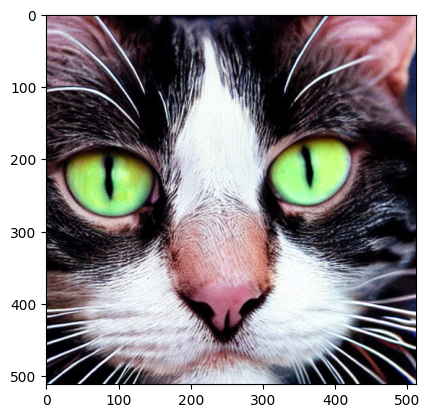

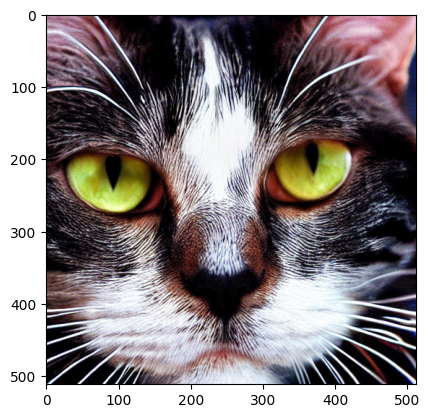

In [17]:
show_images(outputs.images)

## ReweightEdit

In [23]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A smiling turtle"] * 2

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4,
    "equalizer_words": ["smiling"],
    "equalizer_strengths": [5]
}

In [24]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='reweight', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:24<00:00,  2.00it/s]


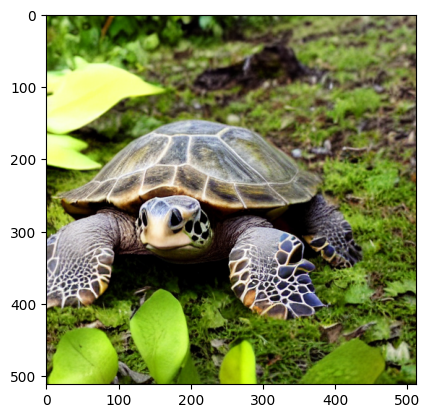

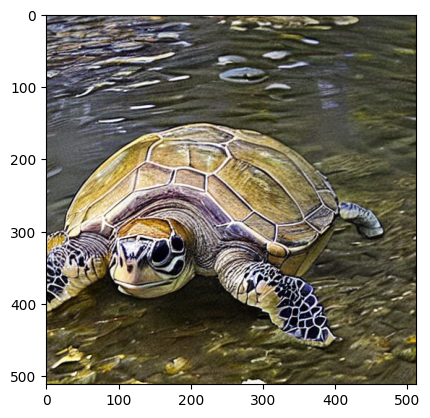

In [25]:
show_images(outputs.images)

## Save and ReplaceEdit

In [26]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle playing with a ball"]

In [27]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='save', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:13<00:00,  3.71it/s]


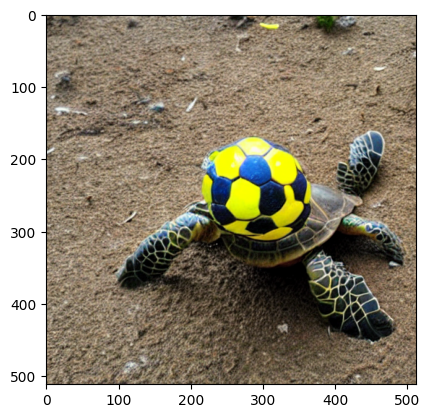

In [28]:
show_images(outputs.images)

In [29]:
# TODO: Allow to run pipeline to get a good image, and then do edit on it
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle playing with a ball",
           "A monkey playing with a ball"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4
}